In [1]:
# Draw a dendogram if possible

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances


#Birch does not scale well in high dimensions
#n_clusters=n_clusters,

In [6]:
n_clusters = 10

## Parameter Grid Search 

In [7]:
branching_factors = [10, 20, 30, 40, 50 ,60, 70, 80, 90, 100]
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
#min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [8]:
def grid_search(logs, labels_, gram, min_df):
    
    result_header = ["Branching Factor", "Threshold", "VMeasure", "Fowlkes-Mallows"]
    results = []
    
    X = get_features(logs, gram, min_df)
    X = X.toarray()

    idxs = np.where(np.all(X == 0, axis=1))

    X = np.delete(X, idxs, axis=0)
    labels_ = np.delete(labels_, idxs)
        
    for bf in branching_factors:
        for thres in thresholds: 
            model = Birch(n_clusters=n_clusters, branching_factor=bf, threshold=thres, compute_labels=True)
            model.fit(X)

            labels = model.labels_

            vm = evaluate_vmeasure(labels_, labels)
            fm = evaluate_fm(labels_, labels)

            result = [bf, thres, vm, fm]
            results.append(result)

            tab_results(result_header, results) 
                
    tab_results(result_header, results)   

In [ ]:
grid_search(logs, log_labels, 2, 70)

+------------------+-----------+--------------------+--------------------+
| Branching Factor | Threshold |      VMeasure      |  Fowlkes-Mallows   |
+------------------+-----------+--------------------+--------------------+
|        10        |    0.1    | 0.8343077224263813 | 0.6940446056633786 |
+------------------+-----------+--------------------+--------------------+


In [ ]:
grid_search(logs, log_labels, 3, 90)

## Bigram Feature Vectorizer

In [24]:
eval_results = []

In [25]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [26]:
model = Birch(n_clusters=n_clusters, branching_factor=70, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [27]:
Y.shape

(27093, 240)

In [28]:
results = evaluate_clustering('Birch Bigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Bigram Clustering', '0.84', '0.87', '0.86', '0.71', '0.86', '0.75']


C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


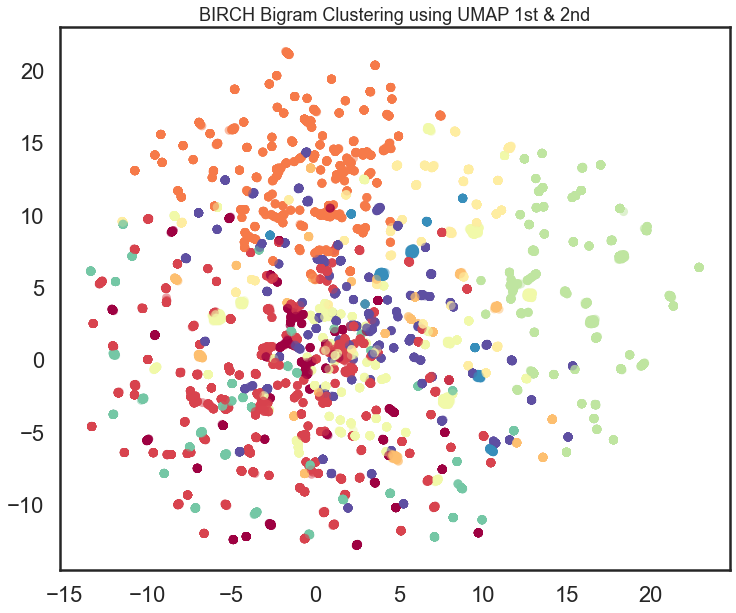

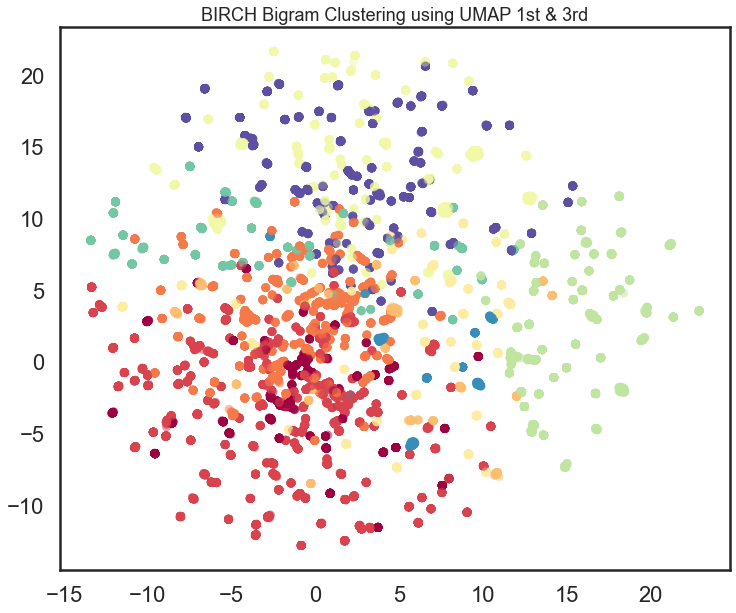

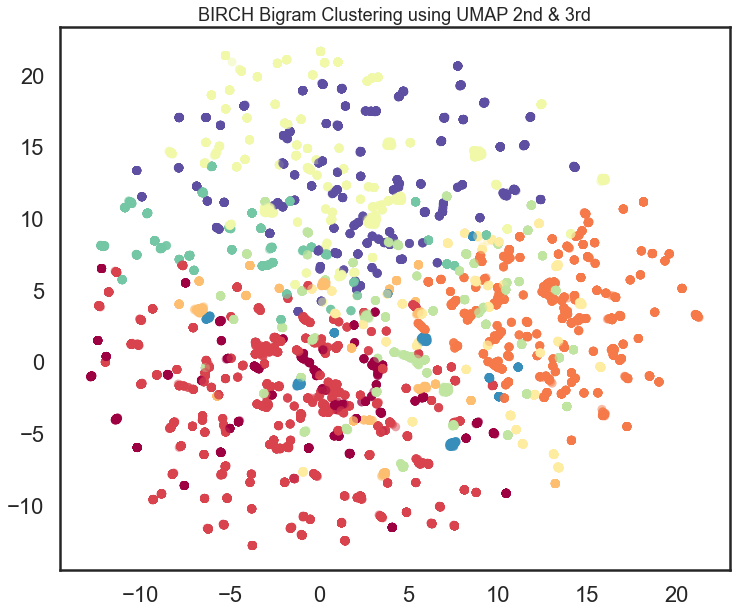

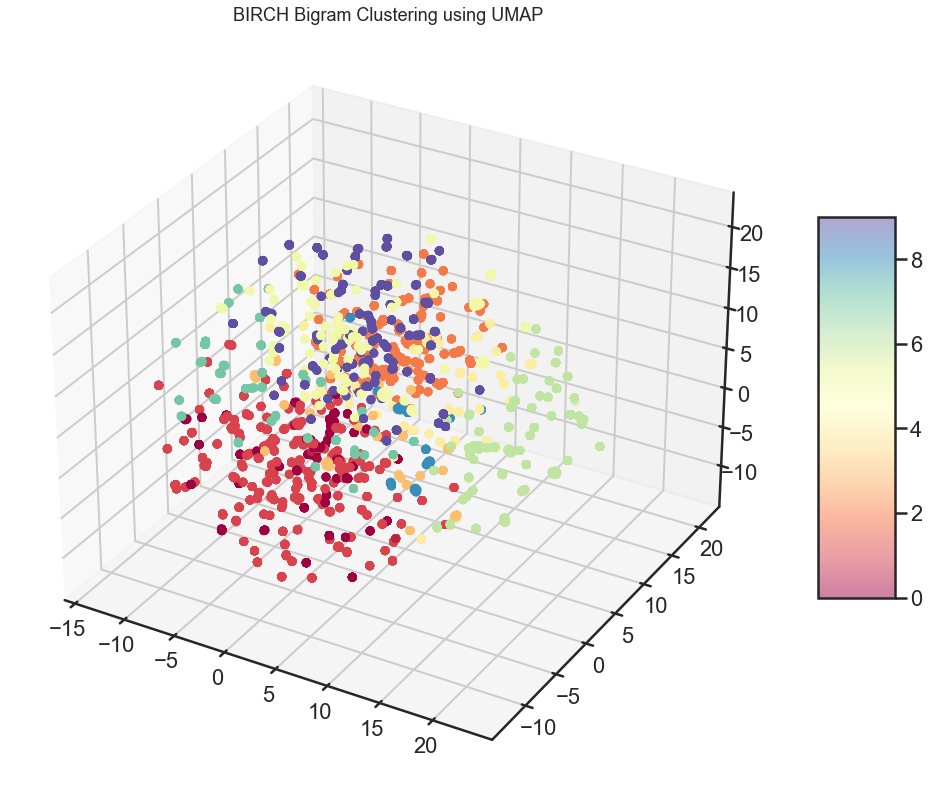

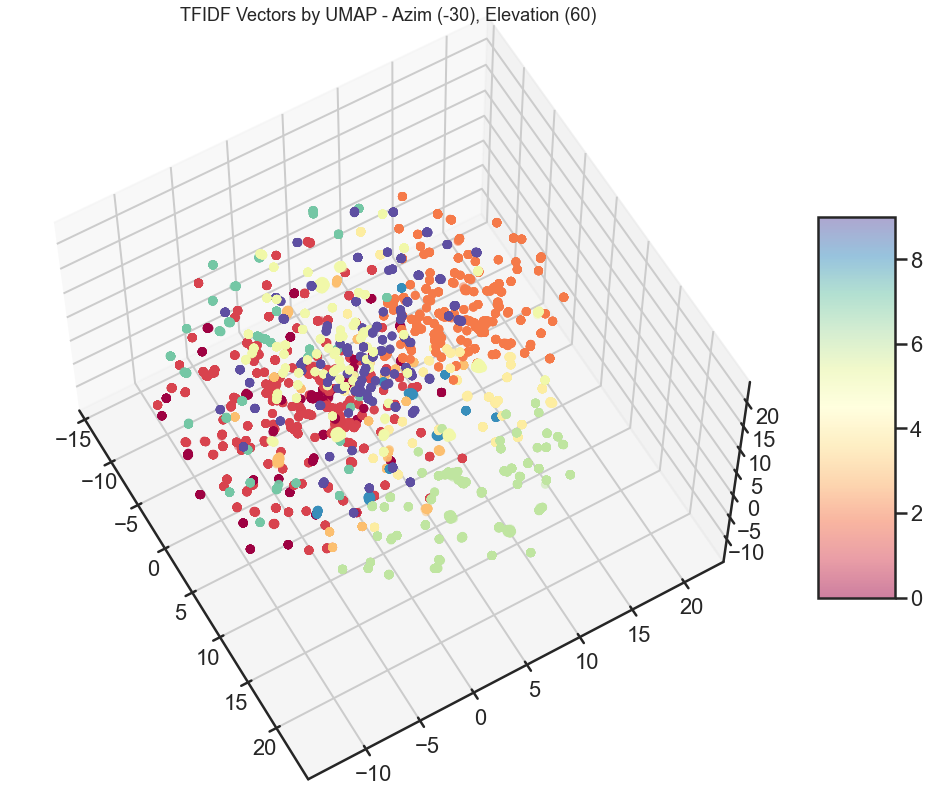

In [29]:
plot_clusters("BIRCH Bigram Clustering using UMAP", X, model.labels_)

In [30]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [31]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [32]:
model = Birch(n_clusters=n_clusters, branching_factor=100, threshold=0.5, compute_labels=True)
Y = model.fit_transform(X)

In [33]:
Y.shape

(27044, 281)

In [34]:
results = evaluate_clustering('Birch Trigram Clustering', X, labels_, model.labels_)
print(results)

['Birch Trigram Clustering', '0.74', '0.82', '0.78', '0.56', '0.78', '0.63']


C:\Users\Riley\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\umap\spectral.py:255: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


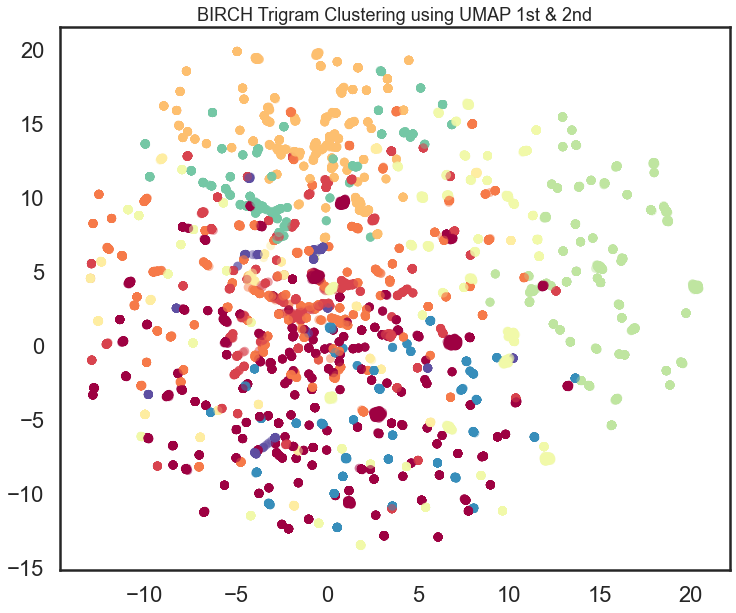

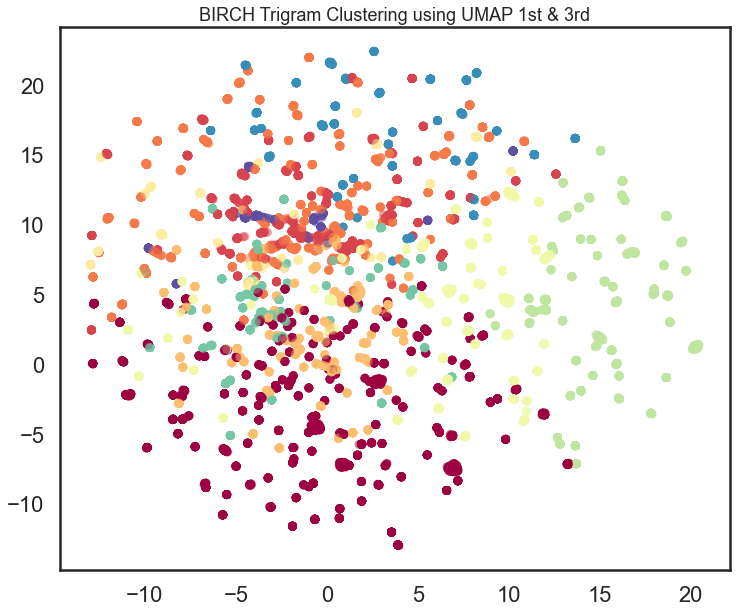

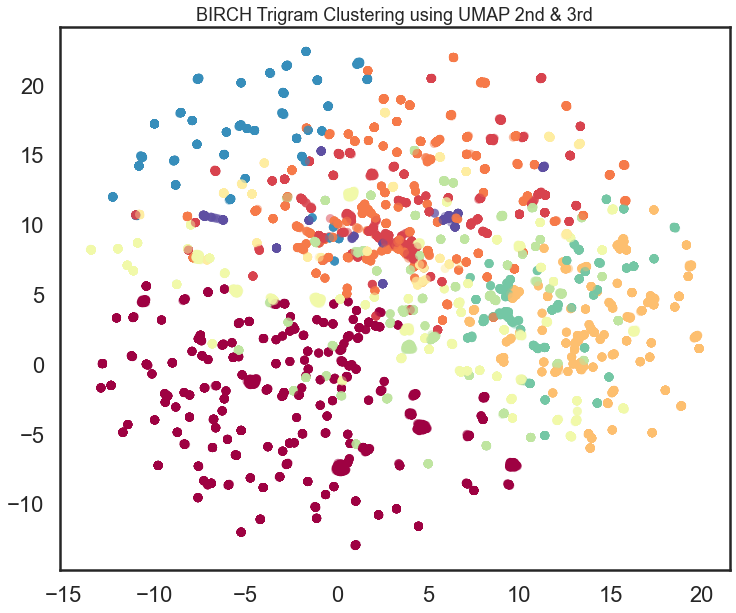

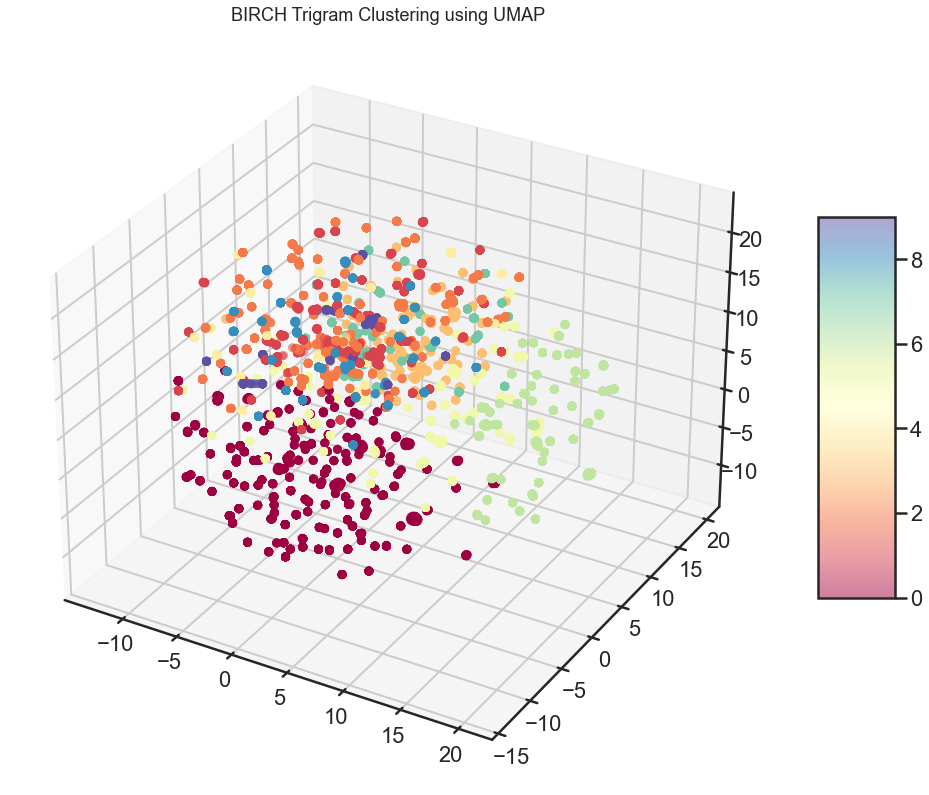

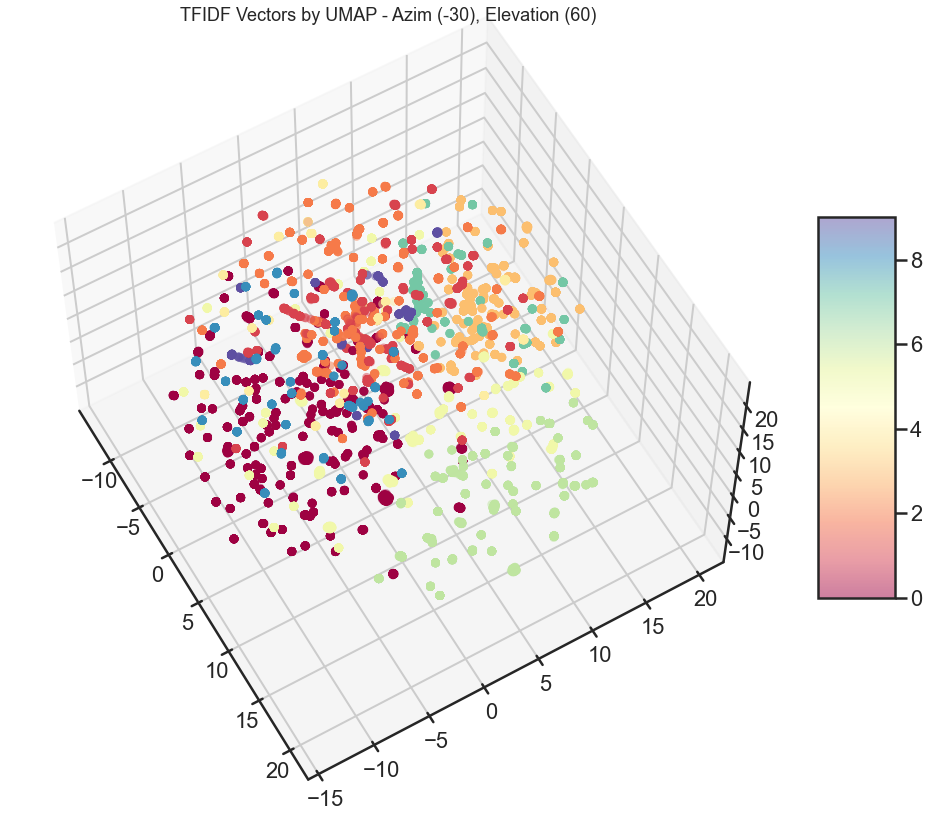

In [35]:
plot_clusters("BIRCH Trigram Clustering using UMAP", X, model.labels_)

In [36]:
eval_results.append(results)